In [1]:
from funcs import *

In [4]:
def clust_diff(cl_c,cl):
    if len(cl_c)==len(cl):
        diff = cl-cl_c
        return diff

In [83]:
n = 50
eps = 0.2
eps2 = 0.001

cluster_numbers = np.asarray([])
cluster_diff = np.array([])

count_experiments = 200
count_activ = 25
prob=1.0

fix_control = set({})
v_c = 0

for i in trange(count_experiments):
    
    x0 = np.random.sample(n)
    x0.sort()
    
    X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
    cl_control = clusters(X_control[t_control],eps,fix_control)
    
    for j in range(count_activ):
        
        X, t, _, _, _ = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
        cltrs = clusters(X[t],eps,fix_control)

        cluster_numbers = np.append(cluster_numbers, len(cltrs))
        
        if(len(cl_control)==len(cltrs)):
            diff = clust_diff(cl_control, cltrs)
            cluster_diff = np.append(cluster_diff, diff)
cluster_diff = np.array(cluster_diff)   
print('Average number of clusters:', np.mean(cluster_numbers))
print('Average difference:', np.mean(cluster_diff[0::2]), np.mean(cluster_diff[1::2]), np.mean(cluster_diff))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:55<00:00,  3.57it/s]

Average number of clusters: 1.995
Average difference: 0.0 0.0 0.0


0 0 0.03892358533261456 0.013463068533395206 0.01121922377782934


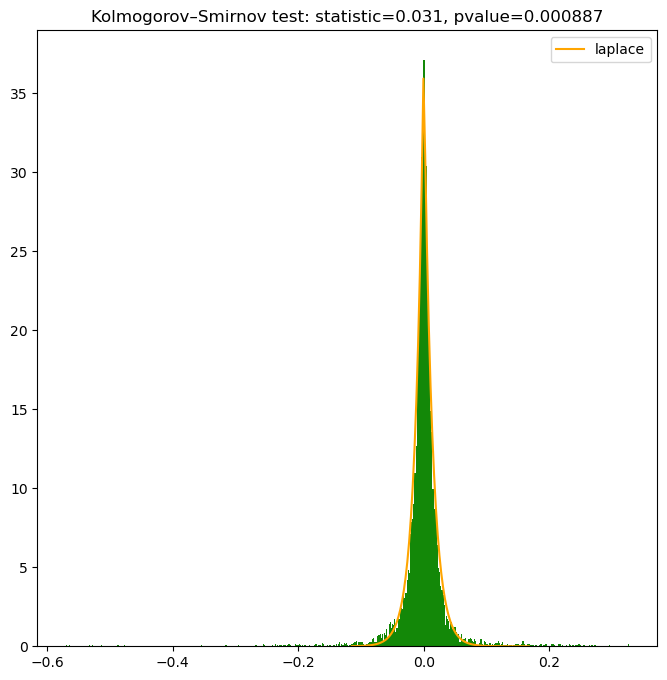

In [80]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cluster_diff), density = True, bins='auto', stacked = True, color = '#138808')

#beta = np.mean(cluster_diff)
beta=0
sigma = np.std(cluster_diff)
#alpha = prob*sigma/(np.sqrt(2))
alpha=1/(2.*hist[0].max())
#alpha=0.02
print(beta, 0, sigma, alpha, 1/(2.4*hist[0].max()))

st, pv =stats.ks_2samp(stats.laplace.rvs(beta, alpha, size=len(np.array(cluster_diff))),np.array(cluster_diff), mode='auto')
plt.plot(x, stats.laplace.pdf(x,beta, alpha), color ="orange", label='laplace')
plt.title(f'Kolmogorov–Smirnov test: statistic={st:.3}, pvalue={pv:.3}')
plt.legend()
plt.show()

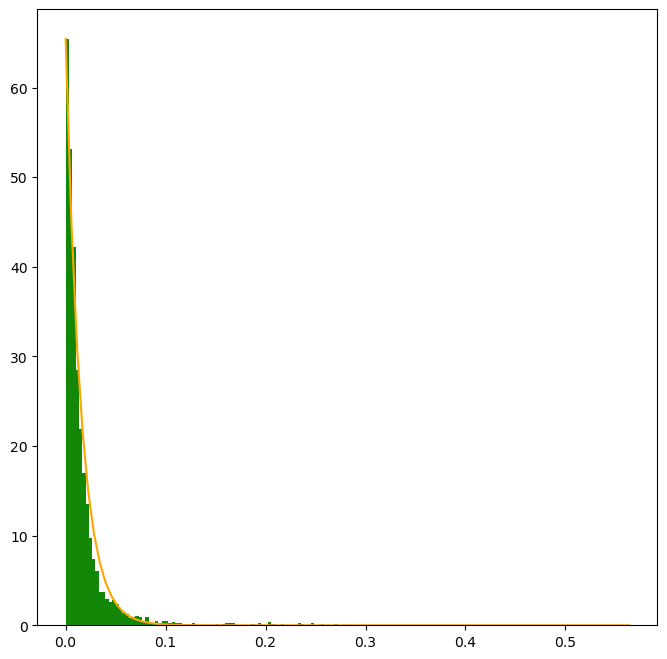

KstestResult(statistic=0.06200199203187251, pvalue=3.914805611477364e-07)

In [81]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(np.abs(cluster_diff[0::2])), density = True, bins=170, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.expon.pdf(x,0, 1/max(hist[0])), color ="orange")
plt.show()
stats.ks_2samp(stats.expon.rvs(0, 1/max(hist[0]), size=len(np.array(cluster_diff[0::2]))),np.array(np.abs(cluster_diff[0::2])), mode='auto')

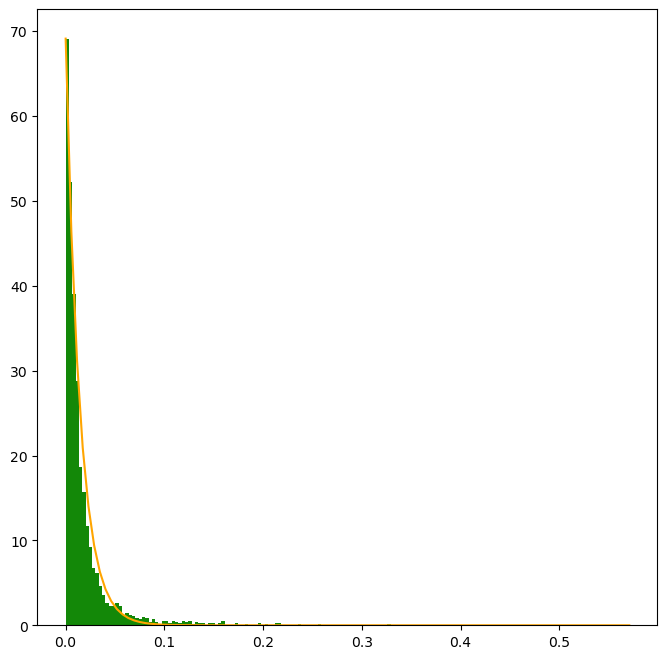

KstestResult(statistic=0.053798256537982564, pvalue=1.78869522842604e-05)

In [82]:
ig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(np.abs(cluster_diff[1::2])), density = True, bins=170, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.expon.pdf(x,0, 1/max(hist[0])), color ="orange")
plt.show()
stats.ks_2samp(stats.expon.rvs(0, 1/max(hist[0]), size=len(np.array(cluster_diff[1::2]))),np.array(np.abs(cluster_diff[1::2])), mode='auto')